In [2]:
# Import Libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

2025-06-14 15:01:22.312427: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749913282.712763    1269 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749913282.823240    1269 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load Images and lables

In [3]:
# Paths
train_dir = "/kaggle/input/cifar-10unzip-folders/Cfar-10/train"
label_path = "/kaggle/input/cifar-10unzip-folders/Cfar-10/trainLabels.csv"
test_dir="/kaggle/input/cifar-10unzip-folders/Cfar-10/test"

# Load labels
df = pd.read_csv(label_path)

In [10]:
# Define class names in the order used
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
# Load images and their labels
X_train = []
y_train = []

for i in range(len(df)):
    image_id = df.iloc[i]['id']
    label = df.iloc[i]['label']
    
    img_path = os.path.join(train_dir, str(image_id) + ".png")
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB for matplotlib
    img = cv2.resize(img, (32, 32))  # optional if images are already 32x32
    
    X_train.append(img)
    y_train.append(class_names.index(label))  # convert label name to index




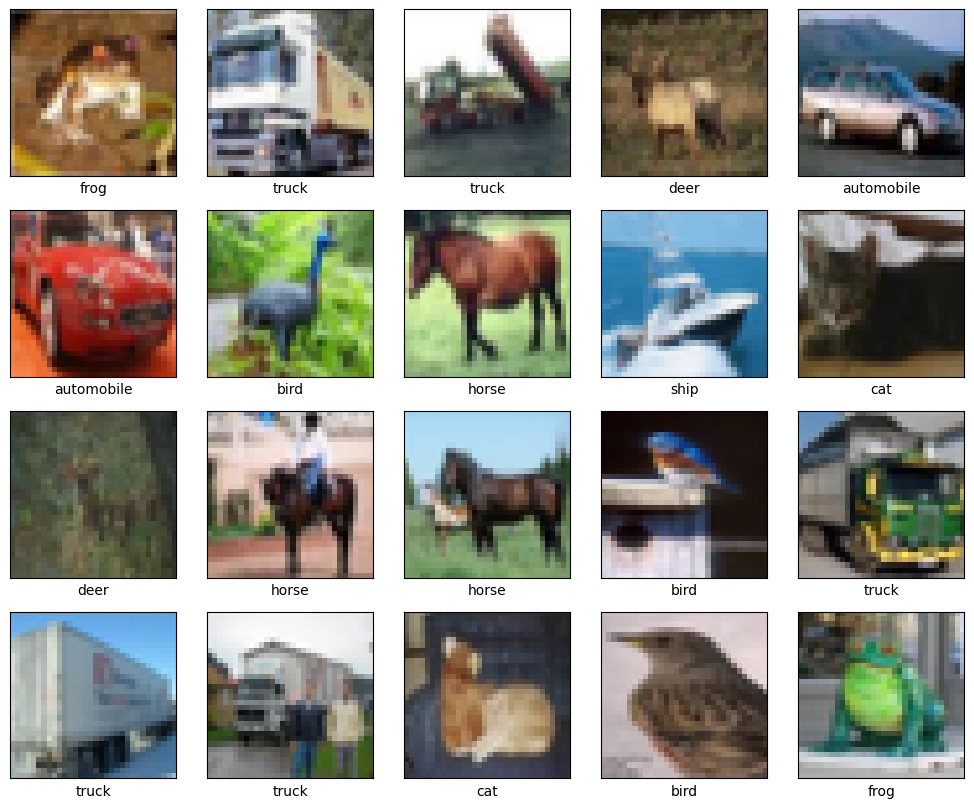

In [57]:

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    
    # Fix label extraction
    label_index = np.argmax(y_train[i]) if hasattr(y_train[i], '__len__') and len(y_train[i]) > 1 else int(y_train[i])
    plt.xlabel(class_names[label_index])
    
plt.tight_layout()
plt.show()



# Data Augmentation

In [58]:
# ✅ ImageDataGenerator for Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    validation_split=0.2
)
datagen.fit(X_train)

# **CNN Model**

In [59]:
#CNN Model
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])



# Model Summary

In [60]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

# Model Trainging

In [61]:
# Train the Model with Augmentation
batch_size = 64
epochs = 30

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size, subset='training'),
    validation_data=datagen.flow(X_train, y_train, batch_size=batch_size, subset='validation'),
    steps_per_epoch=X_train.shape[0] // batch_size,
    epochs=epochs
)



Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/781 ━━━━━━━━━━━━━━━━━━━━ 42s 272ms/step - accuracy: 0.3591 - loss: 2.1029

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 190s 233ms/step - accuracy: 0.3724 - loss: 2.0325 - val_accuracy: 0.4955 - val_loss: 1.4641
Epoch 2/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 177s 227ms/step - accuracy: 0.5505 - loss: 1.2859 - val_accuracy: 0.6172 - val_loss: 1.0850
Epoch 3/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 181s 232ms/step - accuracy: 0.6066 - loss: 1.1029 - val_accuracy: 0.6367 - val_loss: 1.0557
Epoch 4/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 176s 225ms/step - accuracy: 0.6507 - loss: 0.9934 - val_accuracy: 0.4842 - val_loss: 1.6025
Epoch 5/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 171s 219ms/step - accuracy: 0.6620 - loss: 0.9523 - val_accuracy: 0.6536 - val_loss: 1.0021
Epoch 6/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 181s 232ms/step - accuracy: 0.6831 - loss: 0.9023 - val_accuracy: 0.6799 - val_loss: 0.9026
Epoch 7/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 171s 219ms/step - accuracy: 0.6968 - loss: 0.8624 - val_accuracy: 0.6859 - val_loss: 0.8931
Epoch 8/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 170s 217ms/step - accuracy: 0.7075 - loss: 0.83

# Load test images

In [65]:
def load_cifar10_test_data(test_dir, image_size=(32, 32)):
    image_ids = []
    images = []

    for fname in sorted(os.listdir(test_dir)):
        if fname.endswith('.png'):
            img_path = os.path.join(test_dir, fname)
            img = cv2.imread(img_path)
            if img is None:
                print(f"⚠️ Skipping unreadable image: {img_path}")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, image_size)
            images.append(img / 255.0)
            image_ids.append(fname.split('.')[0])

    return np.array(images), image_ids
X_test, test_ids = load_cifar10_test_data(test_dir)

⚠️ Skipping unreadable image: /kaggle/input/cifar-10unzip-folders/Cfar-10/test/109008.png


# Prediction 

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


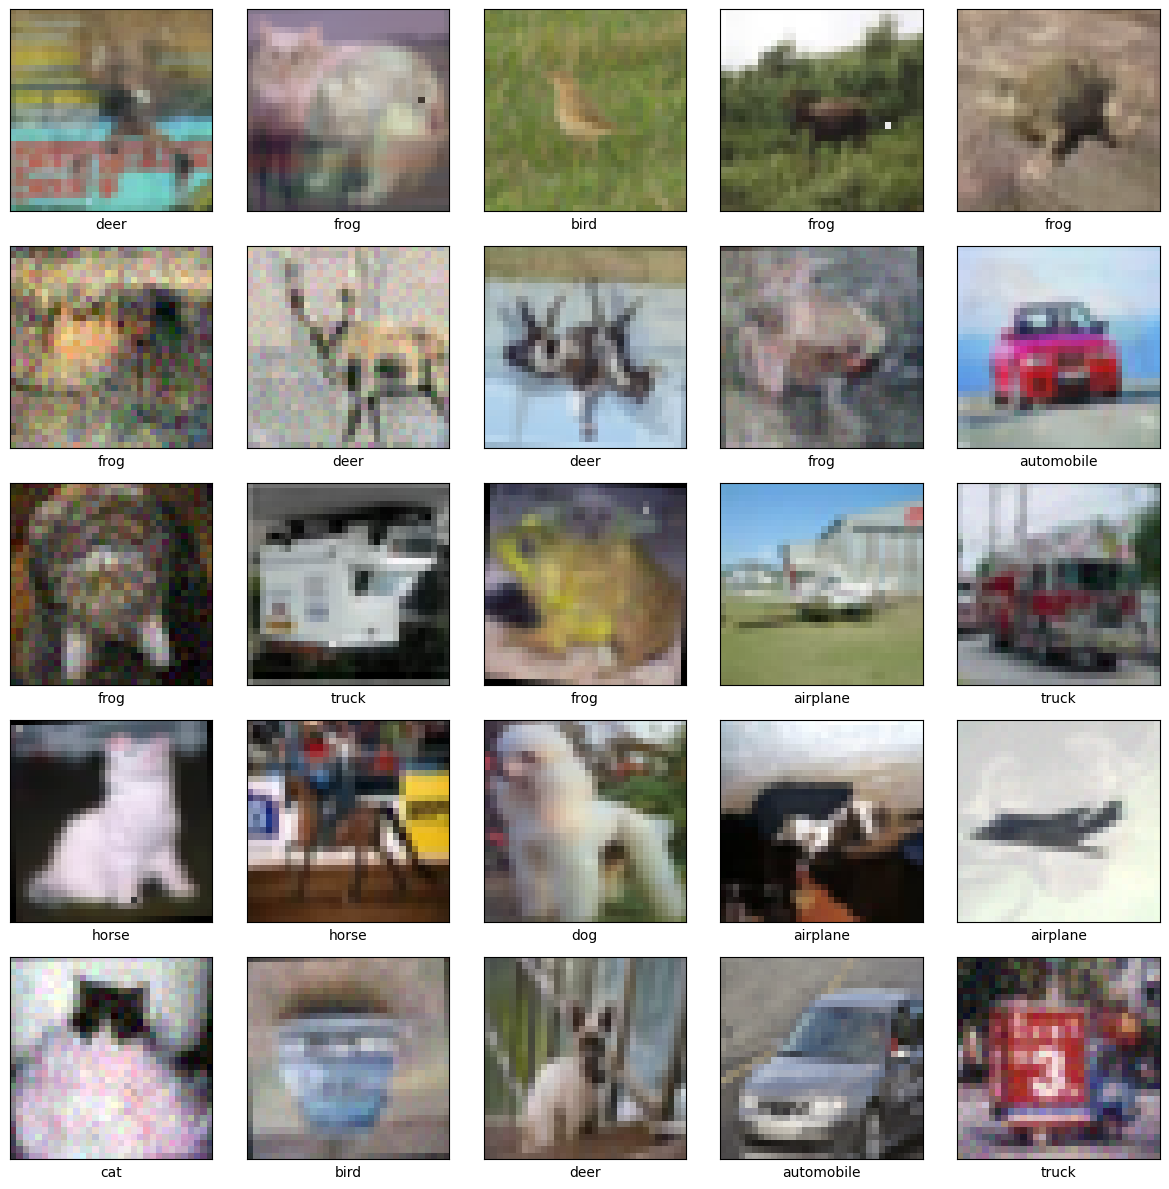

In [69]:
# Predict on Test Images
y_pred = model.predict(X_test)
pred_labels = np.argmax(y_pred, axis=1)
# Show Predictions
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[pred_labels[i]])
plt.tight_layout()
plt.show()

# **Save Model**

In [70]:
# ✅ Save Model
model.save('/kaggle/working/cifar10_augmented_model.h5')
print("✅ Model saved to /kaggle/working/")

✅ Model saved to /kaggle/working/


# Training and validation Accuracy and Loss plot

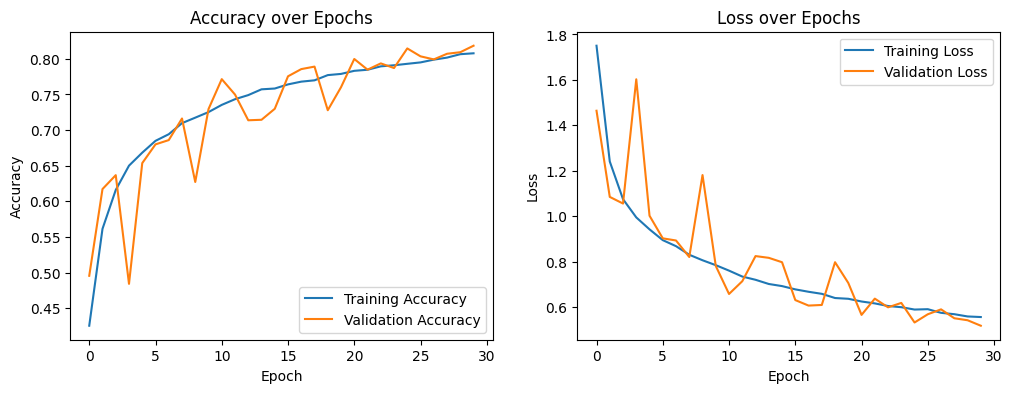

In [72]:
# Plot training and validation accuracy
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **MobileNetV2**

In [11]:
# Paths
train_dir = "/kaggle/input/cifar-10unzip-folders/Cfar-10/train"
label_path = "/kaggle/input/cifar-10unzip-folders/Cfar-10/trainLabels.csv"
test_dir="/kaggle/input/cifar-10unzip-folders/Cfar-10/test"
df = pd.read_csv(label_path)

In [34]:
# Define class names in the order used
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
# Load images and their labels
X_train = []
y_train = []

for i in range(len(df)):
    image_id = df.iloc[i]['id']
    label = df.iloc[i]['label']
    
    img_path = os.path.join(train_dir, str(image_id) + ".png")
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB for matplotlib
    img = cv2.resize(img, (96, 96))
    
    X_train.append(img)
    y_train.append(class_names.index(label))  # convert label name to index


X_train = np.array(X_train, dtype='float32') / 255.0
y_train = to_categorical(np.array(y_train), num_classes=len(class_names))

In [16]:
# Load test images safely
X_test = []
test_ids = sorted(os.listdir(test_dir))

for fname in test_ids:
    img_path = os.path.join(test_dir, fname)
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"⚠️ Failed to load: {img_path}")
        continue  # skip this image if not loaded
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (96, 96))
    X_test.append(img)

X_test = np.array(X_test, dtype='float32') / 255.0


⚠️ Failed to load: /kaggle/input/cifar-10unzip-folders/Cfar-10/test/109008.png


# MobileNetV2 Model (Transfer Learning)

In [37]:
from tensorflow.keras.applications import MobileNetV2

# Load MobileNetV2 with local weights file
base_model = MobileNetV2(
    weights="/kaggle/input/mobilenetv2wieght/tensorflow2/default/1/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_96_no_top.h5",
    include_top=False,
    input_shape=(96, 96, 3)
)

# Freeze base model layers
base_model.trainable = False

In [40]:
from tensorflow.keras import layers, models

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96 (Functional)     │ (None, 3, 3, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [31]:
import numpy as np
from tensorflow.keras.utils import to_categorical

X_train = np.array(X_train, dtype='float32') / 255.0
y_train = to_categorical(np.array(y_train), num_classes=len(class_names))


In [41]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_split=0.1,
    shuffle=True
)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 203s 138ms/step - accuracy: 0.6574 - loss: 0.9958 - val_accuracy: 0.7750 - val_loss: 0.6197
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 184s 131ms/step - accuracy: 0.7747 - loss: 0.6494 - val_accuracy: 0.7970 - val_loss: 0.5659
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 186s 132ms/step - accuracy: 0.7918 - loss: 0.5977 - val_accuracy: 0.7956 - val_loss: 0.5839
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 192s 137ms/step - accuracy: 0.8082 - loss: 0.5499 - val_accuracy: 0.8016 - val_loss: 0.5559
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 189s 134ms/step - accuracy: 0.8187 - loss: 0.5181 - val_accuracy: 0.8016 - val_loss: 0.5627
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 187s 133ms/step - accuracy: 0.8219 - loss: 0.4997 - val_accuracy: 0.8088 - val_loss: 0.5426
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 189s 135ms/step - accuracy: 0.8299 - loss: 0.4766 - val_accuracy: 0.8068 - val_loss: 0.5539
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 190s 135ms/step - ac

# Predict on Test Images

In [42]:
y_pred = model.predict(X_test)
predicted_labels = np.argmax(y_pred, axis=1)
predicted_class_names = [class_names[i] for i in predicted_labels]

313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 125ms/step


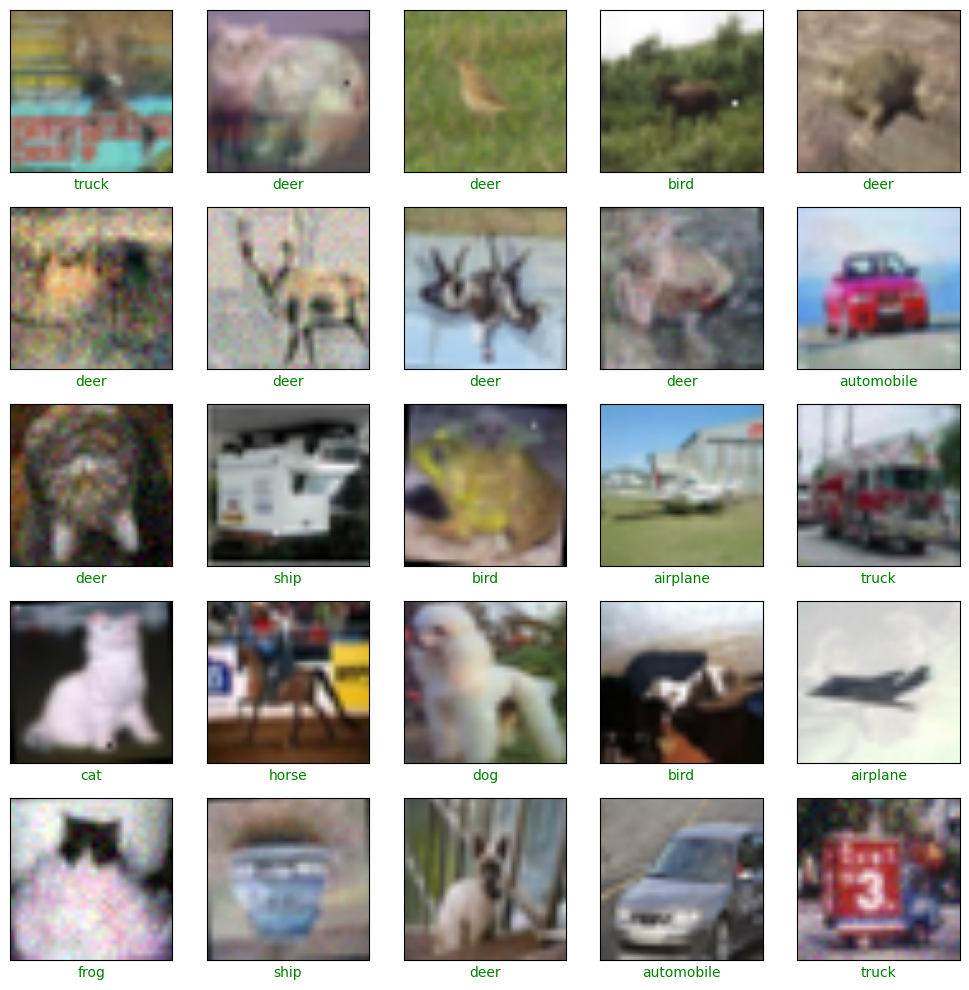

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # No need to index into class_names here
    pred_label = predicted_class_names[i]
    plt.xlabel(pred_label, color='green')

plt.tight_layout()
plt.show()


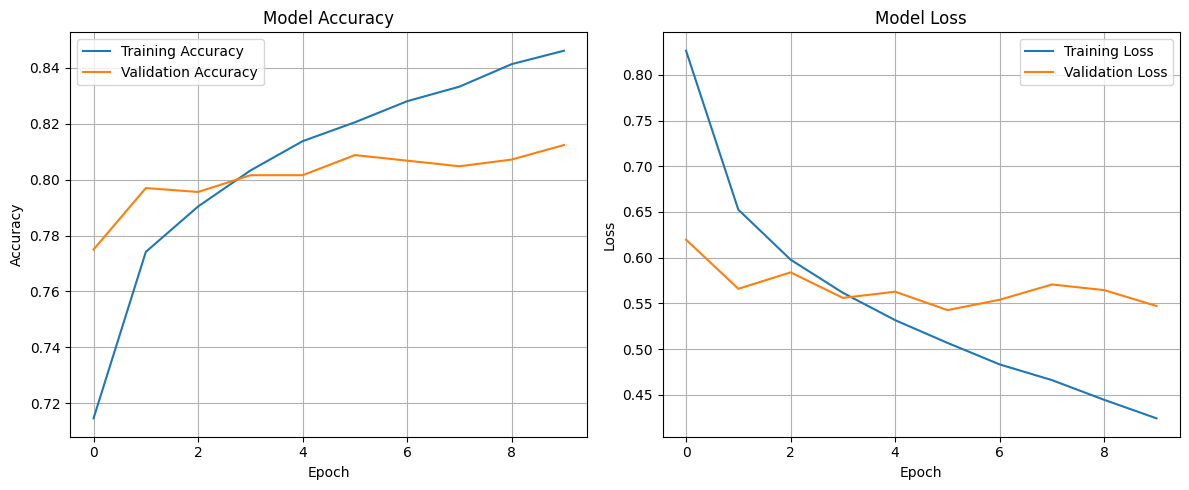

In [50]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
